Data Scrapped from times of india and the hindu

Using GeoCoding Found the Lat and Long of the cities

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
%matplotlib inline

In [2]:
import os
os.chdir('/home/manobhav/PycharmProjects/demonetisation analysis')
ndata=pd.read_csv('Data/demonetlatlong.csv')
ndata.head()

,Date,Heading,Article,Category,Paper,Link,City,Lat,Long,State,Sentiment
0,2016-11-09 06:32:00,Currency demonetisation: RBI got 6 months to p...,"NEW DELHI: Around six months ago, the governme...",business,toi,http://timesofindia.indiatimes.com//business/i...,NaN,NaN,NaN,NaN,1
1,2016-11-09 13:25:00,Demonetisation move to create corruption-free ...,NEW DELHI: The decision to scrap Rs 500 and Rs...,india,toi,http://timesofindia.indiatimes.com//india/Demo...,NaN,NaN,NaN,NaN,1
2,2016-11-09 11:14:00,Demonetisation leads to chaos on Delhi-Gurgaon...,GURUGRAM: The ban on Rs 500 and Rs 1000 curren...,city,toi,http://timesofindia.indiatimes.com//city/gurga...,gurgaon,28.459497,77.026638,Haryana,-1
3,2016-11-10 12:28:00,Currency demonetization puts odds against casinos,PANAJI: Fortunes of the five offshore casino o...,city,toi,http://timesofindia.indiatimes.com//city/goa/C...,goa,15.299326,74.123996,Goa,-1
4,2017-01-24 12:52:00,Kannada film shoots stalled because of demonet...,The currency demonetization came as a surprise...,entertainment,toi,http://timesofindia.indiatimes.com//entertainm...,NaN,NaN,NaN,NaN,-1


Cleaning the Data

In [3]:
def func(x):
    if x.Category in ['Karnataka','Kerala','Tamil Nadu','Telangana','Other States','Delhi','Hyderabad','Kochi','Vijayawada',\
                        'Kozhikode','Bengaluru','Andhra Pradesh','Thiruvananthapuram','Puducherry','Visakhapatnam','Madurai',\
                        'Chennai','Mumbai','Coimbatore','Kolkata','Mangaluru','Metroplus','Tiruchirapalli','States']:
        x.Category='City'
    if x.City!=np.nan:
        x.City=str(x.City).lower().replace(' ','').replace(',','').replace('-','')
    return x  
ndata=ndata.apply(func,axis=1)

In [16]:
ndata.Date = pd.to_datetime(ndata.Date).dt.normalize()
ndata.sort_values(by='Date',inplace=True)
ndata['year'] = ndata.Date.dt.year
ndata['month'] = ndata.Date.dt.month
ndata['day'] = ndata.Date.dt.day

Gettng and plotting the Percentage of Sentiment Category wise

In [4]:
temp=pd.crosstab(ndata['Category'],ndata['Sentiment']).apply(lambda r:r/r.sum(),axis=1)
temp

Sentiment,-1,1
Category,,
Business,0.608696,0.391304
City,0.832512,0.167488
Columns,1.000000,0.000000
Comment,0.000000,1.000000
Economy,0.486486,0.513514
Editorial,0.500000,0.500000
Education,0.000000,1.000000
Industry,0.909091,0.090909
International,0.545455,0.454545


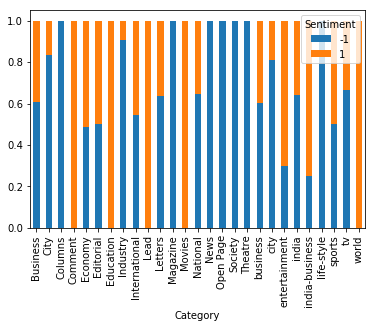

In [5]:
temp.plot(kind='bar',stacked=True)

The one with the highest negative sentiment

In [6]:
k=pd.DataFrame(temp.idxmax(axis=0))
str(k.loc[-1][0])

'Columns'

The one with the highest positive sentiment

In [ ]:
k=pd.DataFrame(temp.idxmax(axis=0))
str(k.loc[1][0])

Plotting the the city from which articles were published colored by state

In [8]:
from mpl_toolkits.basemap import Basemap


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=68.03215,6.746780000000001,97.40238,35.67452&bboxSR=4269&imageSR=4269&size=3000,2954&dpi=96&format=png32&f=image


/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


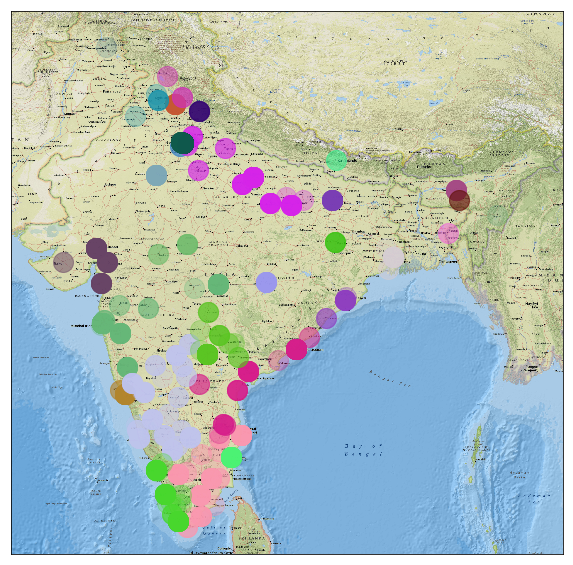

In [12]:
color = np.random.rand(ndata.State[(ndata.Long.isnull()==False)].unique().shape[0], 3)
plt.figure(figsize=(20,10))
m1 = Basemap(projection='mill', llcrnrlat=6.74678, urcrnrlat=35.674520,
                    llcrnrlon=68.03215, urcrnrlon=97.40238, resolution='c', epsg=4269)
m1.arcgisimage(service="NatGeo_World_Map", verbose=True,xpixels=3000)
c = 0
for i in ndata.State[(ndata.Long.isnull()==False)].unique():
    x1, y1 = m1(tuple(ndata.Long[(ndata.Long.isnull()==False) & (ndata.State == i)]), \
         tuple(ndata.Lat[(ndata.Lat.isnull() == False) & (ndata.State == i)]))
    m1.plot(x1,y1,'ro',markersize=20,alpha=0.3, color = color[c] )
    c += 1


In [6]:
def showDateGraph(startdate,enddate,sentiment,paper,granularity):
    d1 = datetime.strptime(startdate, "%Y-%m-%d")-timedelta(days=1)
    d2 = datetime.strptime(enddate, "%Y-%m-%d")+timedelta(days=1)
    #print(startdate,enddate,sentiment,paper,granularity)
    alldata=ndata[(ndata.Sentiment.isin(sentiment))&(ndata.Paper.isin(paper))&(ndata.Date > d1) & (ndata.Date < d2)]
    #print(alldata)


    if sentiment==[-1,1]:
        Group = alldata[alldata.Sentiment==-1].groupby(granularity)['day'].count() / alldata.groupby(granularity)['day'].count()
    else:
        Group = alldata.groupby(granularity)['day'].count()

    Group.plot(kind='line')

2016-10-01 2016-12-01 [-1] ['toi'] day
          Date                                            Heading  \
2   2016-11-09  Demonetisation leads to chaos on Delhi-Gurgaon...   
3   2016-11-10  Currency demonetization puts odds against casinos   
6   2016-11-10       Demonetisation hits jewellery, realty stocks   
7   2016-11-10   Vid towns witness chaos following demonetization   
8   2016-11-10  Centre's demonetisation move impacts businesse...   
9   2016-11-10  CASH CONUNDRUM CONTINUESRealty prices may drop...   
10  2016-11-10        Demonetization to hit private colleges hard   
11  2016-11-10  Panic in Hubballi after the demonetization of ...   
5   2016-11-10  Demonetisation puts tourists in trouble, spoil...   
15  2016-11-10                 City bears brunt of demonetisation   
16  2016-11-10  Supreme Court to hear plea against demonetizat...   
14  2016-11-10  Stalin welcomes demonetization of high denomin...   
31  2016-11-11        Guwahati traders beat demonetization effec

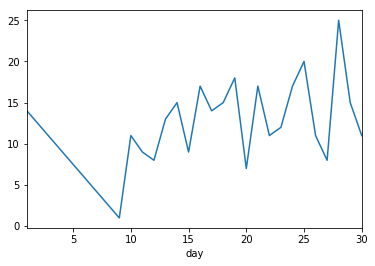

In [23]:
showDateGraph("2016-10-01","2016-12-01",[-1],["toi"],"day")